# Main


In [2]:
import tensorflow as tf
import numpy as np
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns

(60000, 28, 28, 1)


<AxesSubplot:ylabel='count'>

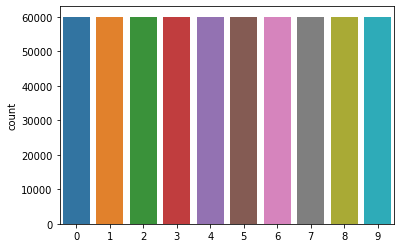

In [11]:
(train_images, train_labels_sparse), (test_images,
                               test_labels_sparse) = tf.keras.datasets.mnist.load_data()

train_labels = tf.keras.utils.to_categorical(train_labels_sparse)
test_labels = tf.keras.utils.to_categorical(test_labels_sparse)

# normalize the values
train_images, test_images = train_images/255.0, test_images/255.0
train_images, test_images = np.expand_dims(
    train_images, axis=-1), np.expand_dims(test_images, axis=-1)
print(train_images.shape)

sns.countplot(train_labels)


# Model Definition

In [14]:
# model definition
model = models.Sequential()
model.add(layers.Conv2D(28, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(train_images, train_labels, epochs=10, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1447 - accuracy: 0.9554 - val_loss: 0.0586 - val_accuracy: 0.9816
Epoch 2/10
1510/1875 [=======================>......] - ETA: 8s - loss: 0.0475 - accuracy: 0.9855

In [12]:
# model definition
model = models.Sequential()
model.add(layers.Conv2D(28, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(train_images, train_labels_sparse, epochs=10, shuffle=True, validation_data=(test_images, test_labels_sparse))

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1516 - accuracy: 0.9536 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0295 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0166 - accuracy: 0.9951 - val_loss: 0.0282 - val_accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0306 -

# Data Loss

313/313 - 1s - loss: 0.0503 - accuracy: 0.9893
0.989300012588501


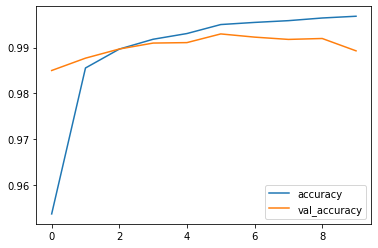

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel = 'Epochs'
plt.ylabel = 'Accuracy'
#plt.ylim([0.6, 1])
plt.legend(loc='lower right')

# Regular Cross Entropy
test_loss, test_acc = model.evaluate(test_images, test_labels_sparse, verbose=2)

# Sparse Entropy
# test_loss, test_acc = model.evaluate(test_images, test_labels_sparse, verbose=2)
print(test_acc)

Cross Entropy
313/313 - 2s - loss: 0.0294 - accuracy: 0.9922
0.9922000169754028

Sparse Cross Entropy
313/313 - 1s - loss: 0.0503 - accuracy: 0.9893
0.989300012588501

# MNIST

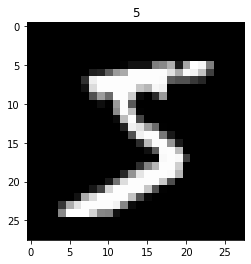

In [ ]:
import random

#train_images = train_images[:,:,:,0] # run to reshape values so the following runs
#print(train_images.shape)
plt.imshow(train_images[0], cmap='gray')
plt.title('%i' % train_labels[0])
plt.show()

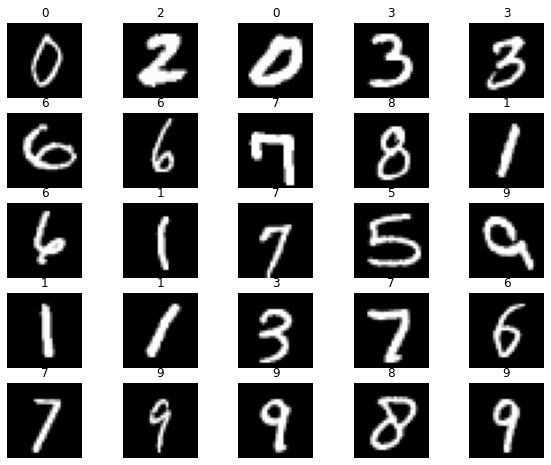

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols*rows+1):
  sample_indx = random.randint(0, len(train_images)-1)
  img, label = train_images[sample_indx], train_labels[sample_indx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()